Group: Seunghyeon (Hyeon) Kim

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## Create a network using Stochastic Block Model

In [2]:
sizes = np.array([10,10,20]) #sizes of the components
c = [0] * sizes[0] + [1] * sizes[1] + [2] * sizes[2] #for coloring
communities = [np.arange(sizes[:i].sum(),sizes[:i+1].sum()) for i in range(len(sizes))] # for modularity
probs = np.array([[0.65, 0.05, 0.02], [0.05, 0.35, 0.07], [0.02, 0.07, 0.40]]) # probability matrix
G = nx.stochastic_block_model(sizes, probs, seed=0)

In [3]:
print(c)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [4]:
print(communities)

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]), array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39])]


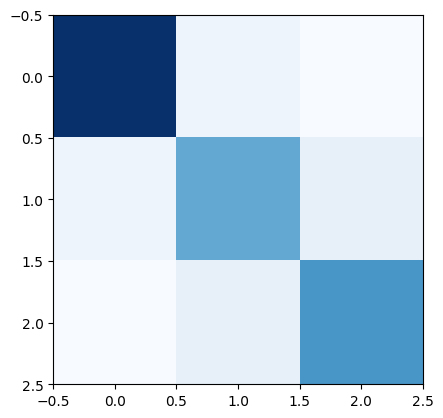

In [5]:
plt.imshow(probs,cmap='Blues');

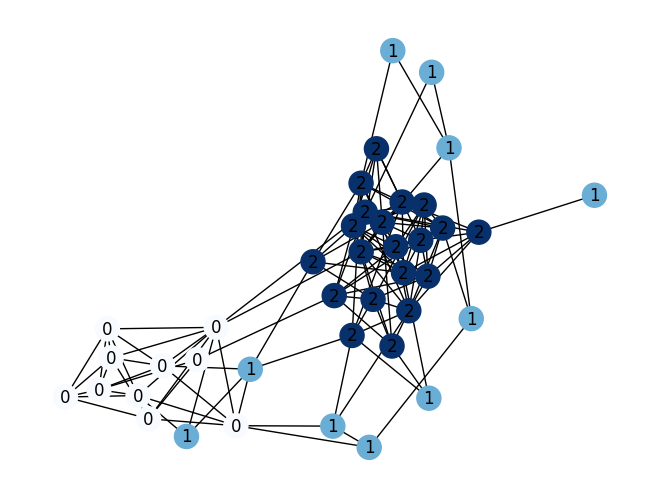

In [6]:
node_labels = [str(c[i]) for i in range(len(G.nodes))]
nx.draw(G,with_labels=True, node_color=c,labels=dict(zip(G.nodes(), node_labels)),cmap='Blues')

## Measure the modularity

In [7]:
nx.community.modularity(G,communities)

0.3361828915125863

In [8]:
sizes = np.array([10,10,20])
c = [0] * sizes[0] + [1] * sizes[1] + [2] * sizes[2] #for coloring
communities = [np.arange(sizes[:i].sum(),sizes[:i+1].sum()) for i in range(len(sizes))]
probs = np.array([[1, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1]])
G = nx.stochastic_block_model(sizes, probs, seed=0)

In [9]:
nx.community.modularity(G,communities)

0.4878826530612245

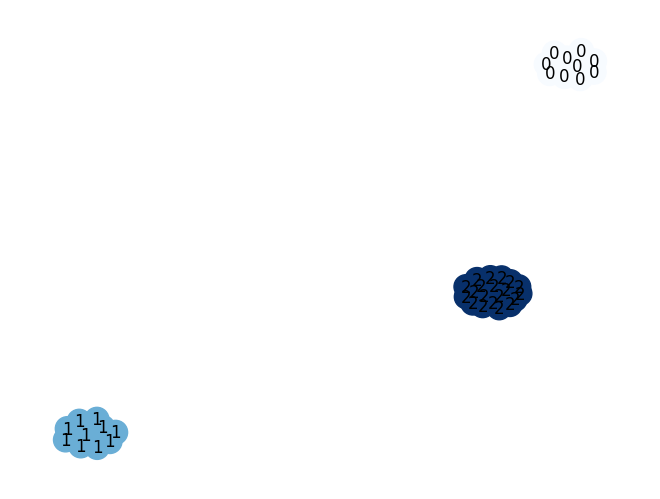

In [10]:
node_labels = [str(c[i]) for i in range(len(G.nodes))]
nx.draw(G,with_labels=True, node_color=c,labels=dict(zip(G.nodes(), node_labels)),cmap='Blues')

In [11]:
sizes = np.array([10,10])
c = [0] * sizes[0] + [1] * sizes[1] #for coloring
communities = [np.arange(sizes[:i].sum(),sizes[:i+1].sum()) for i in range(len(sizes))]
probs = np.array([[1, 0.0], [0.0, 1.0]])
G = nx.stochastic_block_model(sizes, probs, seed=0)

In [12]:
nx.community.modularity(G,communities)

0.5

## Determine the communities using the greedy modularity

In [13]:
sizes = np.array([10,10,20])
c = [0] * sizes[0] + [1] * sizes[1] + [2] * sizes[2] #for coloring
communities = [np.arange(sizes[:i].sum(),sizes[:i+1].sum()) for i in range(len(sizes))]
probs = np.array([[0.65, 0.05, 0.02], [0.05, 0.35, 0.07], [0.02, 0.07, 0.40]])
G = nx.stochastic_block_model(sizes, probs, seed=0)

In [14]:
comm = nx.community.greedy_modularity_communities(G)

In [15]:
print(nx.community.modularity(G,communities))
print(nx.community.modularity(G,comm))

0.3361828915125863
0.3658108710180441


In [16]:
c2 = []
for i in range(len(G.nodes)):
    for j in range(len(comm)):
        if i in comm[j]:
            c2.append(j)

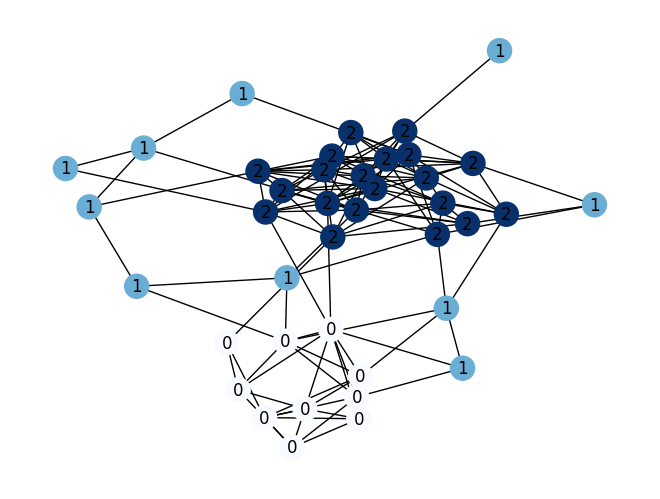

In [17]:
node_labels = [str(c[i]) for i in range(len(G.nodes))]
pos = nx.layout.spring_layout(G)
nx.draw(G,pos=pos, with_labels=True, \
        node_color=c,labels=dict(zip(G.nodes(), node_labels)),cmap='Blues')

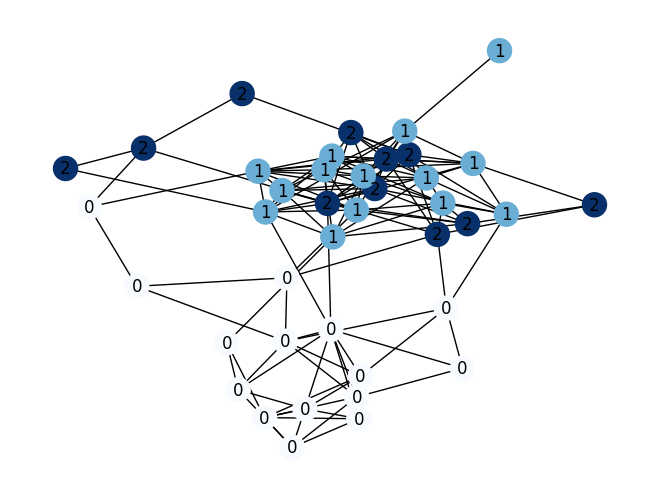

In [18]:
node_labels = [str(c2[i]) for i in range(len(G.nodes))]
nx.draw(G,pos=pos, with_labels=True, \
        node_color=c2,labels=dict(zip(G.nodes(), node_labels)),cmap='Blues')

In [19]:
print(c)
print(c2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1]


## Jaccard and Rand index

Let $a_{11}$, ($a_{00}$) be the number of nodes pairs (not) in the
same community in both partitions, $a_{10}$, $a_{01}$ be the number of
nodes pairs present only in one of the partitions. Other words:
$a_{11}$ true positive, $a_{00}$ true negative, $a_{01}, ~a_{10}$
false prediction (pairs here not pairs there)

 *  Rand index:
$$\frac{a_{11}+a_{00}}{a_{11}+a_{00}+a_{01}+a_{10}}$$
 * Jaccard index
$$\frac{a_{11}}{a_{11}+a_{01}+a_{10}}$$


In [20]:
a = np.zeros((2,2), dtype=int)
nodes = list(G.nodes())

In [21]:
for i in nodes:
  for j in nodes:
    if i == j: continue
    if c[i] == c[j]:
      i1 = 1
    else:
      i1 = 0
    if c2[i] == c2[j]:
      i2 = 1
    else:
      i2 = 0
    a[i1][i2] += 1
print(a)

[[818 182]
 [240 320]]


In [22]:
# Jaccard index:
print(a[1,1]/(a[1,1]+a[0,1]+a[1,0]))

0.431266846361186


In [23]:
# Rand index:
print((a[1,1]+a[0,0])/(a[1,1]+a[0,0]+a[0,1]+a[1,0]))

0.7294871794871794


## Load the Zachari karate club data

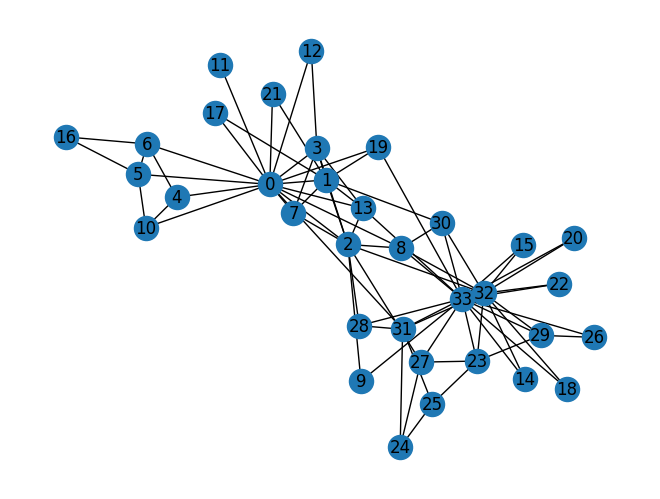

In [24]:
# prompt: load the zachari karate club data into a networkx graph

import networkx as nx

# Load the Zachary Karate Club dataset
G = nx.karate_club_graph()

nx.draw(G, with_labels=True)


In [25]:
club_membership = nx.get_node_attributes(G, 'club')
club_membership

{0: 'Mr. Hi',
 1: 'Mr. Hi',
 2: 'Mr. Hi',
 3: 'Mr. Hi',
 4: 'Mr. Hi',
 5: 'Mr. Hi',
 6: 'Mr. Hi',
 7: 'Mr. Hi',
 8: 'Mr. Hi',
 9: 'Officer',
 10: 'Mr. Hi',
 11: 'Mr. Hi',
 12: 'Mr. Hi',
 13: 'Mr. Hi',
 14: 'Officer',
 15: 'Officer',
 16: 'Mr. Hi',
 17: 'Mr. Hi',
 18: 'Officer',
 19: 'Mr. Hi',
 20: 'Officer',
 21: 'Mr. Hi',
 22: 'Officer',
 23: 'Officer',
 24: 'Officer',
 25: 'Officer',
 26: 'Officer',
 27: 'Officer',
 28: 'Officer',
 29: 'Officer',
 30: 'Officer',
 31: 'Officer',
 32: 'Officer',
 33: 'Officer'}

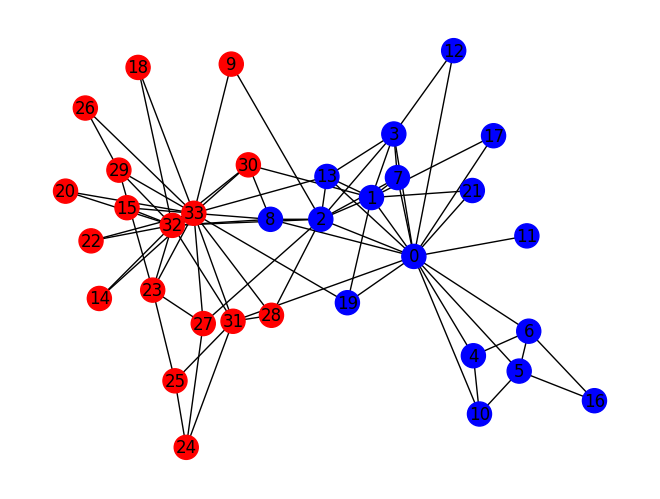

In [26]:
# prompt: official division in zachari karate club

import networkx as nx
import matplotlib.pyplot as plt

# Load the Zachary Karate Club dataset
G = nx.karate_club_graph()

# Get the club membership for each node
club_membership = nx.get_node_attributes(G, 'club')

# Create a dictionary to map nodes to their club
node_to_club = {node: club for node, club in club_membership.items()}

# Assign a color to each club
club_colors = {'Mr. Hi': 'blue', 'Officer': 'red'}

# Create a list of node colors based on club membership
node_colors = [club_colors[club] for club in node_to_club.values()]

# Draw the graph with colored nodes based on club
nx.draw(G, with_labels=True, node_color=node_colors)

plt.show()


## Tasks:

 1. Calculate the modularity for the Karate club with the official partition
 2. Use greedy modularity to create some partitions
 3. Measure the modularity and the Jaccard index of these partitions.
 4. Set the number of modules to 2 in the greedy modularity (option: `best_n=2`). Repeat the previous procedure

In [27]:
# Calculate the modularity for the Karate club with the official partition

communities = []
for club in set(club_membership.values()):
  community = [node for node, member in club_membership.items() if member == club]
  communities.append(community)

modularity = nx.community.modularity(G, communities)
print(modularity)

0.39143756676224206


In [28]:
# Use greedy modularity to create some partitions
comm = nx.community.greedy_modularity_communities(G)

In [29]:
print(nx.community.modularity(G,communities))
print(nx.community.modularity(G,comm))

0.39143756676224206
0.41096493693896297


In [30]:
c2 = []
for i in range(len(G.nodes)):
    for j in range(len(comm)):
        if i in comm[j]:
            c2.append(j)

In [31]:
# Measure the modularity and the Jaccard index of these partitions.
a = np.zeros((2,2), dtype=int)
nodes = list(G.nodes())

for i in nodes:
  for j in nodes:
    if i == j: continue
    if c[i] == c[j]:
      i1 = 1
    else:
      i1 = 0
    if c2[i] == c2[j]:
      i2 = 1
    else:
      i2 = 0
    a[i1][i2] += 1
print(a)

[[572 188]
 [150 212]]


In [32]:
# Jaccard index:
print(a[1,1]/(a[1,1]+a[0,1]+a[1,0]))

0.38545454545454544


In [33]:
# Rand index:
print((a[1,1]+a[0,0])/(a[1,1]+a[0,0]+a[0,1]+a[1,0]))

0.6987522281639929


In [60]:
# Set the number of modules to 2 in the greedy modularity (option: best_n=2). Repeat the previous procedure
comm = nx.community.greedy_modularity_communities(G, best_n = 2)

In [61]:
print(nx.community.modularity(G,communities))
print(nx.community.modularity(G,comm))

0.39143756676224206
0.3998332115215232


In [36]:
c2 = []
for i in range(len(G.nodes)):
    for j in range(len(comm)):
        if i in comm[j]:
            c2.append(j)

In [37]:
# Measure the modularity and the Jaccard index of these partitions.
a = np.zeros((2,2), dtype=int)
nodes = list(G.nodes())

for i in nodes:
  for j in nodes:
    if i == j: continue
    if c[i] == c[j]:
      i1 = 1
    else:
      i1 = 0
    if c2[i] == c2[j]:
      i2 = 1
    else:
      i2 = 0
    a[i1][i2] += 1
print(a)

[[492 268]
 [ 86 276]]


In [38]:
# Jaccard index:
print(a[1,1]/(a[1,1]+a[0,1]+a[1,0]))

0.4380952380952381


In [39]:
# Rand index:
print((a[1,1]+a[0,0])/(a[1,1]+a[0,0]+a[0,1]+a[1,0]))

0.6844919786096256
